In [8]:
import pandas as pd

In [9]:
import xlrd

In [10]:
rd = pd.read_csv('c:/users/chpar10/downloads/Created isell orders details (CRE06)_ytd.csv')
rd.head()

c:\users\chpar10\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Country,Store,Creation Date,Creation Time,Order Number,Order Type,Article No,Article Name,HFB,PA,...,Quantity Type,Price Per Piece,Goods Value,VAT amount/for goods value,Status,Customer Type,Sales Item Id,Family Number,Order Method,Client System
0,KR,539,2019-11-30,20:29,162845036,ISOM,80278579,HYLLIS 휠리스 - 선반유닛,17,1714,...,PIECES,"14,710.67","44,132.01","4,012",205/Pending,PRIVATE,4,NaN,INTERNET,ICP
1,KR,539,2019-11-30,22:01,162847059,ISOM,50245849,BESTÅ 베스토 - 프레임,2,211,...,PIECES,"34,803","34,803","3,163.91",700/Completed,PRIVATE,24,NaN,INTERNET,ICP
2,KR,539,2019-11-30,15:13,162837991,ISOM,10442192,TONSÄTTA 톤세타 꽃병 21 블루 AP,16,1633,...,PIECES,"12,900","12,900","1,172.73",250/Placed,PRIVATE,1,NaN,INTERNET,ICP
3,KR,373,2019-11-30,18:37,162843240,SALESORDER,20402256,TORNVIKEN 토른비켄 벽선반 120 오프화이트 AP,7,782,...,PIECES,"69,900","69,900","6,354.55",700/Completed,NaN,3,NaN,STORE,ISELL
4,KR,373,2019-11-30,15:05,162837515,SALESORDER,50422328,IVAR 이바르 옷장R 83x50 AP,17,1714,...,PIECES,"15,000","75,000","6,818.18",700/Completed,PRIVATE,7,NaN,STORE,ISELL


___
- 2개 이상 구매 order number만 분석 대상
> 1. 2개 이상 구매한 Order Number 추출
> 2. 2개 이상 구매로 rd 재구성

In [63]:
idx = rd.groupby('Order Number', as_index=False)['Country'].count()
idx= idx[idx['Country']>1]
idx = [i for i in idx['Order Number']]

In [64]:
def search_func(row):
    if row["Order Number"] in idx:    
        return "Yes"
    else:
        return "No"

In [65]:
rd['Match'] = rd.apply(search_func, axis=1)

In [67]:
new_rd = rd[rd['Match'] == 'Yes']

In [74]:
new_rd = new_rd.loc[:,['Creation Date', 'Order Number', 'Article No', 'Article Name', 'HFB', 'Quantity', 'Goods Value']]
#new_rd.to_csv('Cre06(singleOrderFiltered).csv', index=False)

___
- 키친 HFB7, 화장실 HFB6 추가?삭제 검토 필요

In [25]:
order_number = []
for i in rd['Order Number'][rd['HFB']==7]:
    order_number.append(i)
for i in rd['Order Number'][rd['HFB']==6]:
    order_number.append(i)
order_number

[162843240,
 162828984,
 162829284,
 162826934,
 162828566,
 162840745,
 162840745,
 162831667,
 162831667,
 162843750,
 162844488,
 162826042,
 162832595,
 161671572,
 161671572,
 162840745,
 162831667,
 162831667,
 162837813,
 162842279,
 162836266,
 162847089,
 162830142,
 162831046,
 162842305,
 162844583,
 162832060,
 162832092,
 162838617,
 162840745,
 162840745,
 162847504,
 162828244,
 162836266,
 162838603,
 162828327,
 162836955,
 162840372,
 162828327,
 162831667,
 162843446,
 162843735,
 162843750,
 162843044,
 162826934,
 162836266,
 162832994,
 162839334,
 162844583,
 162847881,
 162824792,
 162833282,
 162832092,
 162836266,
 162836266,
 162847895,
 162836192,
 161671572,
 162839384,
 162836266,
 162838404,
 162828327,
 162834981,
 162826934,
 162836266,
 162837884,
 162828327,
 162844397,
 162828185,
 162836923,
 162829961,
 162847167,
 162833282,
 162832060,
 162828327,
 162829961,
 162840745,
 162828327,
 162831667,
 162843934,
 162824844,
 162837884,
 162828327,
 162

In [31]:
order_number = [i for i in set(order_number)]

In [36]:
idx = []
for i in rd['Order Number']:
    idx.append(i in order_number)
idx

KeyboardInterrupt: 

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
rd = rd.loc[:,['Order Number', 'Article No', 'Quantity']]
rd.Quantity = [int(1) for i in rd.Quantity]
rd.Quantity.astype(int)
rd = rd.drop_duplicates()
rd.head()

,Order Number,Article No,Quantity
0,162845036,80278579,1
1,162847059,50245849,1
2,162837991,10442192,1
3,162843240,20402256,1
4,162837515,50422328,1


In [21]:
new_data = rd[:300000]

In [22]:
test_set = new_data.groupby(['Order Number', 'Article No'])['Quantity'].count().unstack().reset_index().fillna(0).set_index('Order Number')

In [23]:
test_result = apriori(test_set, min_support = 0.002, use_colnames=True, max_len=2, low_memory=True)

In [24]:
test_result

,support,itemsets
0,0.002623,(162380)
1,0.002093,(179390)
2,0.002199,(217976)
3,0.002266,(271751)
4,0.004195,(272312)
5,0.006432,(277197)
6,0.002565,(279945)
7,0.002681,(315397)
8,0.003607,(321379)
9,0.002054,(340165)


In [26]:
association_rules(test_result, metric = 'lift', min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(277197),(70170503),0.006432,0.012218,0.002797,0.434783,35.585944,0.002718,1.747615
1,(70170503),(277197),0.012218,0.006432,0.002797,0.228887,35.585944,0.002718,1.288486
2,(20351332),(40165206),0.004494,0.005853,0.002054,0.457082,78.088655,0.002028,1.831116
3,(40165206),(20351332),0.005853,0.004494,0.002054,0.350906,78.088655,0.002028,1.533686
4,(40351331),(20351332),0.004503,0.004494,0.002083,0.462527,102.928086,0.002063,1.852197
5,(20351332),(40351331),0.004494,0.004503,0.002083,0.463519,102.928086,0.002063,1.855606
6,(30165198),(40165206),0.004629,0.005853,0.002324,0.502083,85.776843,0.002297,1.996612
7,(40165206),(30165198),0.005853,0.004629,0.002324,0.397035,85.776843,0.002297,1.650793
8,(40351331),(40165206),0.004503,0.005853,0.002218,0.492505,84.140523,0.002192,1.958930
9,(40165206),(40351331),0.005853,0.004503,0.002218,0.378913,84.140523,0.002192,1.602829


In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

In [ ]:
rules = association_rules(test_result, metric = 'lift', min_threshold=1)
rules

In [2]:
import matplotlib

In [3]:
tmp = pd.read_excel(r'C:\Users\chpar10\Downloads\tmp.xlsx',sheet_name='Sheet6')

In [49]:
tmp.head()

,date,time,inbound,failure
0,2019-11-04,17,57,11
1,2019-11-11,13,78,9
2,2019-11-04,15,51,9
3,2019-11-07,13,50,9
4,2019-11-11,15,62,8


Text(0, 0.5, 'calls after 30s')

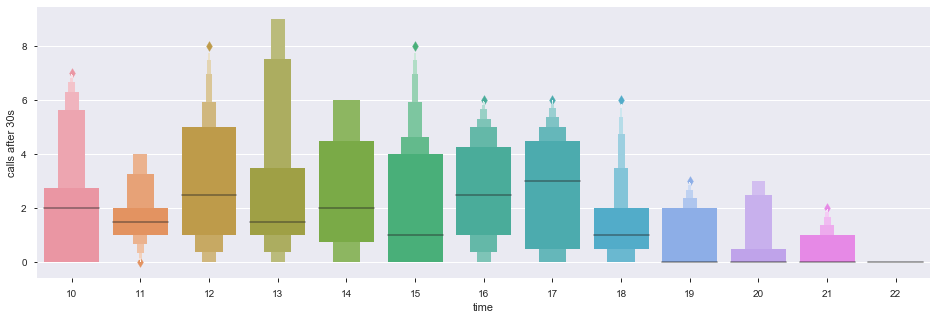

In [5]:
plt.figure(figsize=(16,5))
sns.boxenplot(data = tmp[tmp.date>'2019-11-05'], x = 'time', y = 'failure')
plt.ylabel('calls after 30s')

Text(0, 0.5, 'calls after 30s')

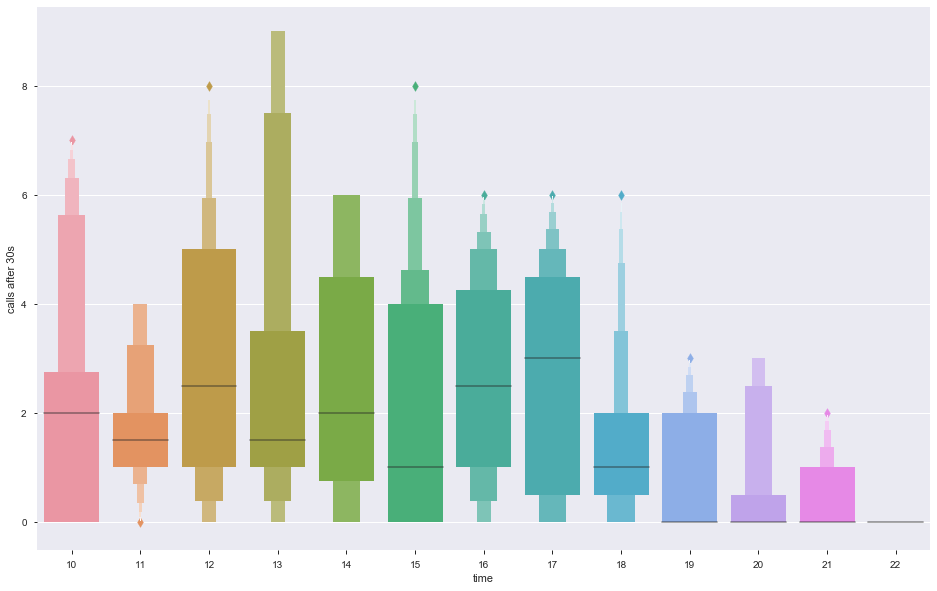

In [64]:
plt.figure(figsize=(16,10))
sns.boxenplot(data = tmp[tmp.date>'2019-11-05'], x = 'time', y = 'failure')
plt.ylabel('calls after 30s')

In [10]:
tmp = pd.read_excel(r'C:\Users\chpar10\Downloads\tmp.xlsx',sheet_name='Sheet9')

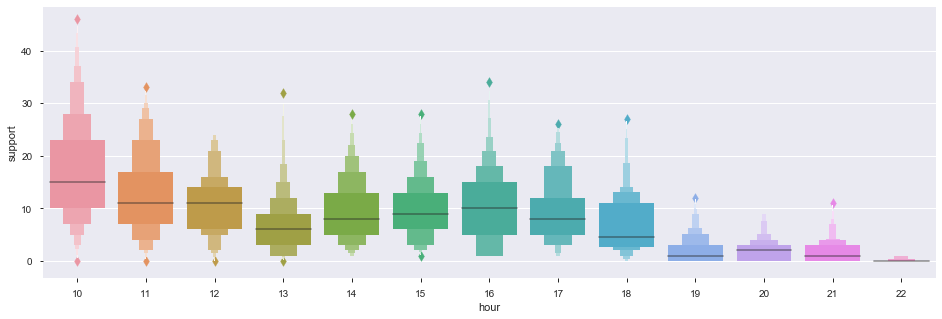

In [12]:
plt.figure(figsize=(16,5))
sns.boxenplot(data = tmp, x = 'hour', y = 'support')
#sns.boxenplot(data=tmp, x='hour', y='total')

In [13]:
tmp = pd.read_excel(r'C:\Users\chpar10\Downloads\tmp.xlsx',sheet_name='Sheet10')
tmp.head()

,date,hour,type,call
0,2019-10-01,10,support,25
1,2019-10-01,11,support,21
2,2019-10-01,12,support,16
3,2019-10-01,13,support,5
4,2019-10-01,14,support,10


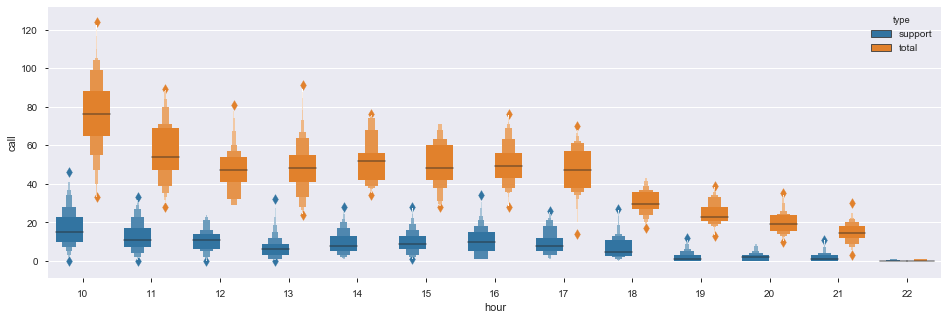

In [33]:
plt.figure(figsize=(16,5))
sns.boxenplot(data=tmp, x='hour', y='call', hue = 'type')

In [33]:
tmp = pd.read_excel(r'C:\Users\chpar10\Downloads\tmp.xlsx',sheet_name='Sheet7')

In [6]:
tmp[['svl', 'util']].corr()

,svl,util
svl,1.000000,-0.174251
util,-0.174251,1.000000


Text(0.5, 1.0, 'actual relationship (Feb.-Nov.)')

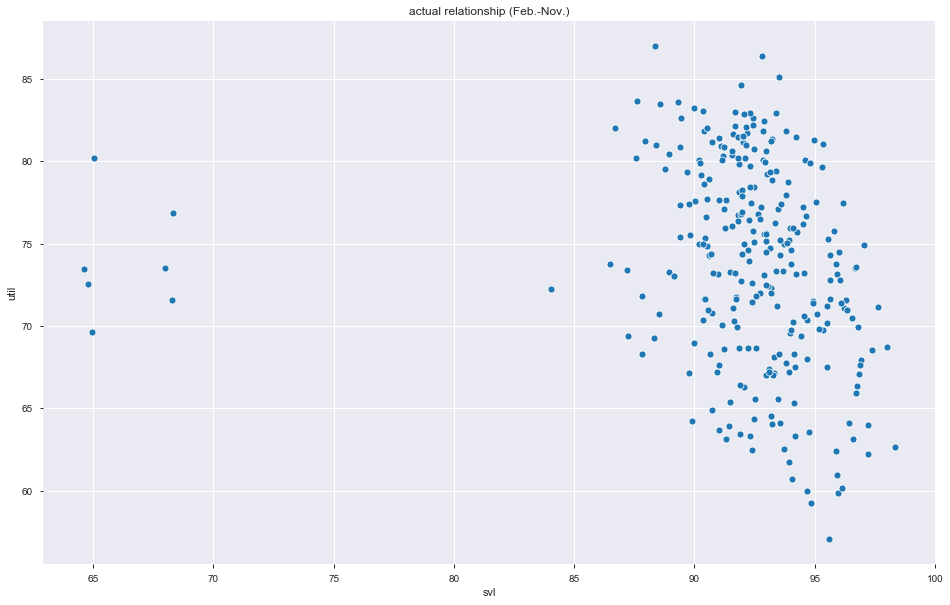

In [7]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = tmp, x = 'svl', y = 'util')
plt.title('actual relationship (Feb.-Nov.)')

In [41]:
tmp[tmp.date>'2019-09-01'][['svl', 'share']].corr()
tmp[['svl', 'share']].corr()

,svl,share
svl,1.00000,-0.15956
share,-0.15956,1.00000


Text(0, 0.5, 'support')

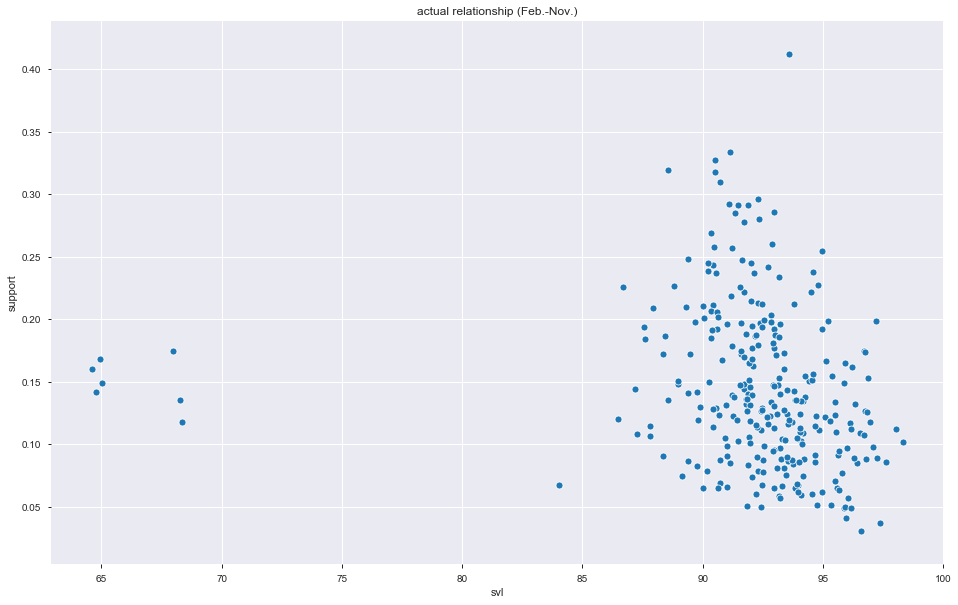

In [42]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = tmp, x = 'svl', y = 'share')
plt.title('actual relationship (Feb.-Nov.)')
plt.ylabel('support')

In [10]:
deviation = [np.random.randn() for i in range(100)]

In [11]:
x = [i for i in range(55,90)]
x

[55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89]

In [31]:
dev=[]
for a, b in zip(x, deviation):
    dev.append(110-(1/a+5*b))

Text(0, 0.5, 'util')

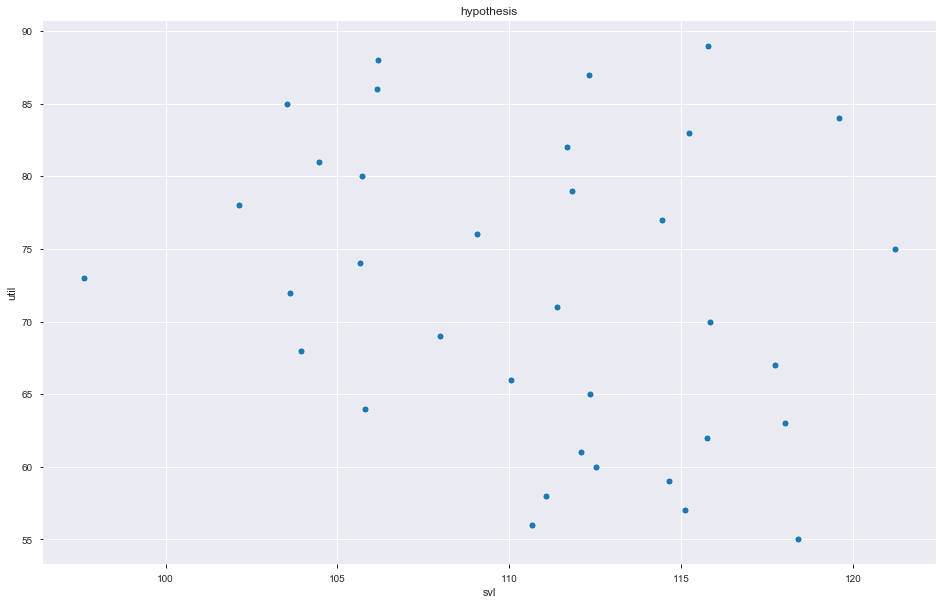

In [32]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=dev, y=x)
plt.title('hypothesis')
plt.xlabel('svl')
plt.ylabel('util')

In [118]:
dev=[]
for a, b in zip(x, deviation):
    dev.append(np.log(a+1*b))

Text(0, 0.5, 'util')

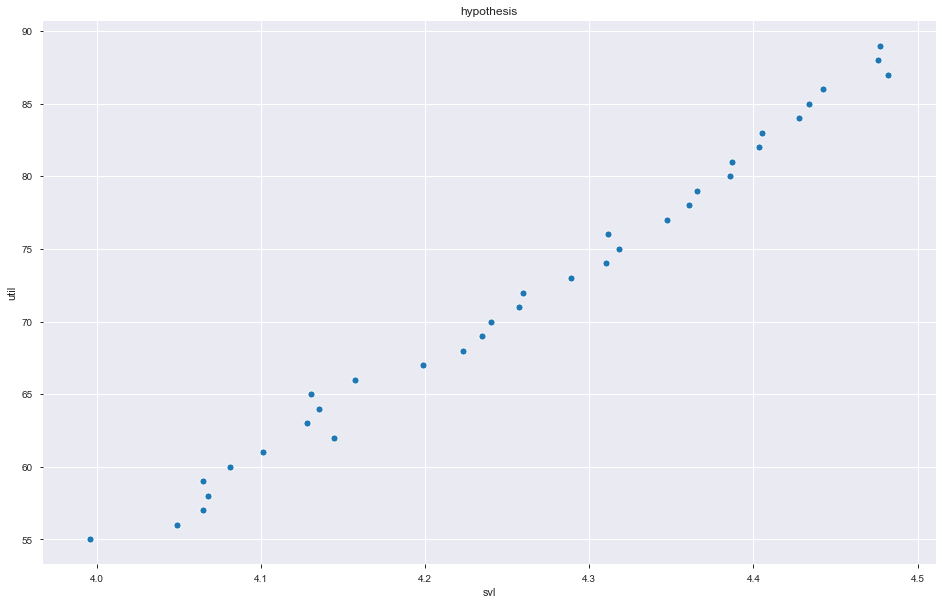

In [119]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=dev, y=x)
plt.title('hypothesis')
plt.xlabel('svl')
plt.ylabel('util')

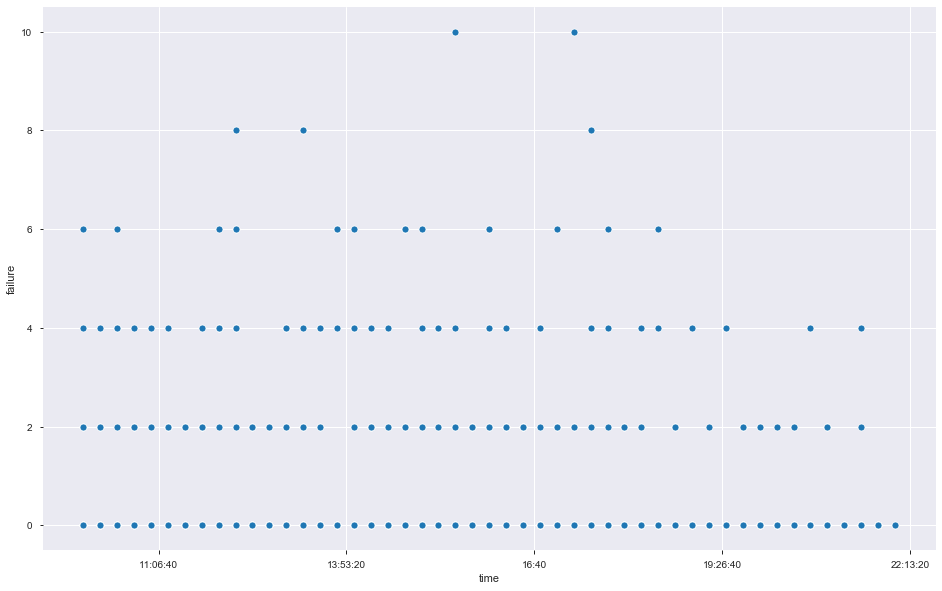

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = tmp[tmp.date>'2019-11-05'], x = 'time', y = 'failure')

In [68]:
tmp.corr()

,TalkTime,count,ATT,share
TalkTime,1.000000,-0.105662,0.178694,-0.105169
count,-0.105662,1.000000,-0.002938,0.960651
ATT,0.178694,-0.002938,1.000000,0.008777
share,-0.105169,0.960651,0.008777,1.000000


In [69]:
test = {'wrapupcode':[], 'correlation':[] }

for wucode in tmp.Wrapupcode.unique():
    test['wrapupcode'].append(wucode)
    test['correlation'].append(tmp[tmp.Wrapupcode == wucode].corr().iloc[2,3].round(4))
    

In [70]:
tmp_df = pd.DataFrame(test)
tmp_df.sort_values(['correlation'], ascending = False)

,wrapupcode,correlation
16,부가서비스(매장) - 변경/취소,0.2373
12,부가서비스 - 분실/파손,0.1996
0,CSC - SAC 상태 확인,0.1823
15,부가서비스 - 직원불만,0.1742
29,이커머스 - 주문변경,0.1645
4,교환/환불 - 단순변심,0.1462
1,CSC SALES,0.1453
3,교환/환불 - 결제/판매 오류,0.1374
37,제품 - 조립방법,0.1350
27,이커머스 - 제품문의,0.1153


In [106]:
top5 = [i for i in tmp_df.sort_values(['correlation'], ascending = False)['wrapupcode'][:5]]
bottom5 = [i for i in tmp_df.sort_values(['correlation'])['wrapupcode'][:5]]

In [113]:
idx = [i in bottom5 for i in tmp.Wrapupcode]
tmp[idx]

,yymmdd,Wrapupcode,TalkTime,count,ATT,share
9,2019-08-01,매장 - 분실물,141,21,231,0.020
25,2019-08-01,이커머스 - 쇼핑방법,279,17,231,0.016
35,2019-08-01,제품 - 재고확인,198,57,231,0.055
53,2019-08-02,매장 - 분실물,129,33,235,0.031
69,2019-08-02,이커머스 - 쇼핑방법,249,19,235,0.018
77,2019-08-02,제품 - 재고확인,177,51,235,0.048
96,2019-08-03,매장 - 분실물,170,23,274,0.028
110,2019-08-03,이커머스 - 쇼핑방법,543,8,274,0.010
120,2019-08-03,제품 - 재고확인,194,22,274,0.026
137,2019-08-04,매장 - 분실물,180,39,233,0.048


In [119]:
tmp.columns

Index(['yymmdd', 'Wrapupcode', 'TalkTime', 'count', ' ATT ', 'share'], dtype='object')

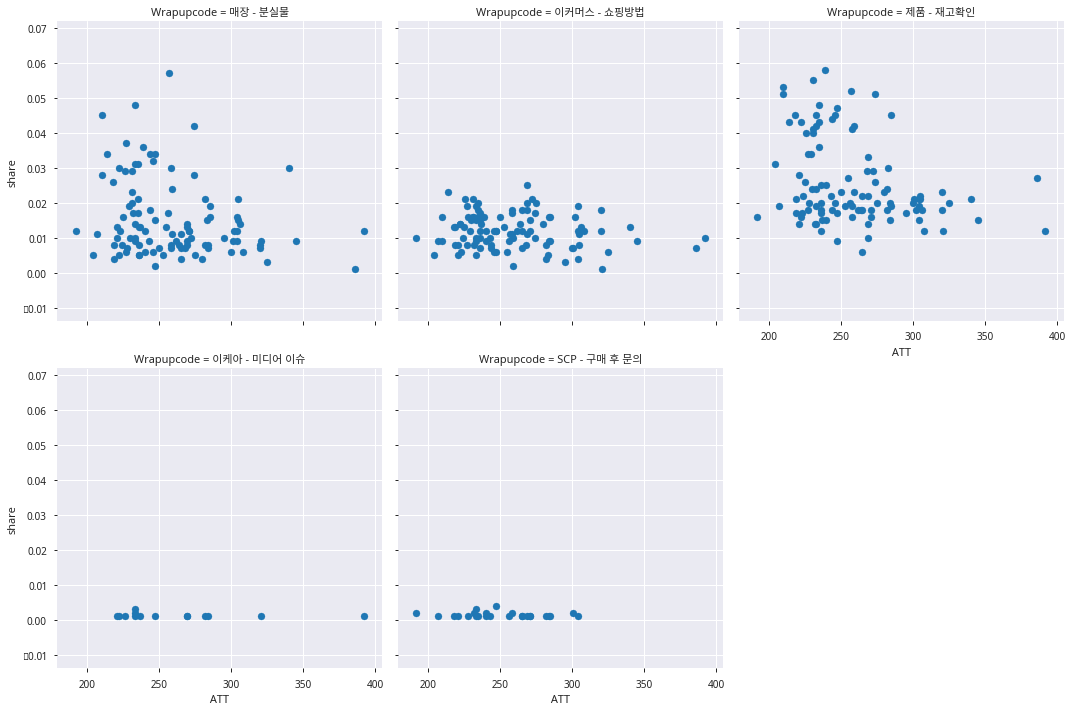

In [124]:
sns.FacetGrid(tmp[idx], col='Wrapupcode', col_wrap=3, height = 5).map(plt.scatter, ' ATT ', 'share')

In [93]:
tmp1 = tmp[tmp.Wrapupcode=="부가서비스(매장) - 변경/취소"]

,yymmdd,Wrapupcode,TalkTime,count,ATT,share
0,2019-08-01,CSC - SAC 상태 확인,199,4,231,0.004
1,2019-08-01,CSC SALES,479,17,231,0.016
2,2019-08-01,NS,312,24,231,0.023
3,2019-08-01,교환/환불 - 결제/판매 오류,265,17,231,0.016
4,2019-08-01,교환/환불 - 단순변심,210,86,231,0.083
5,2019-08-01,교환/환불 - 제품하자,329,84,231,0.081
6,2019-08-01,기타 - 기타,183,45,231,0.043
7,2019-08-01,기타 - 이전 상담원 연결요청/부재중 문의,66,23,231,0.022
8,2019-08-01,매장 - 결제관련,148,10,231,0.010
9,2019-08-01,매장 - 분실물,141,21,231,0.020


Text(0.5, 1.0, '"제품 - 재고확인" 문의 비중에 따른 ATT 변화 추이')

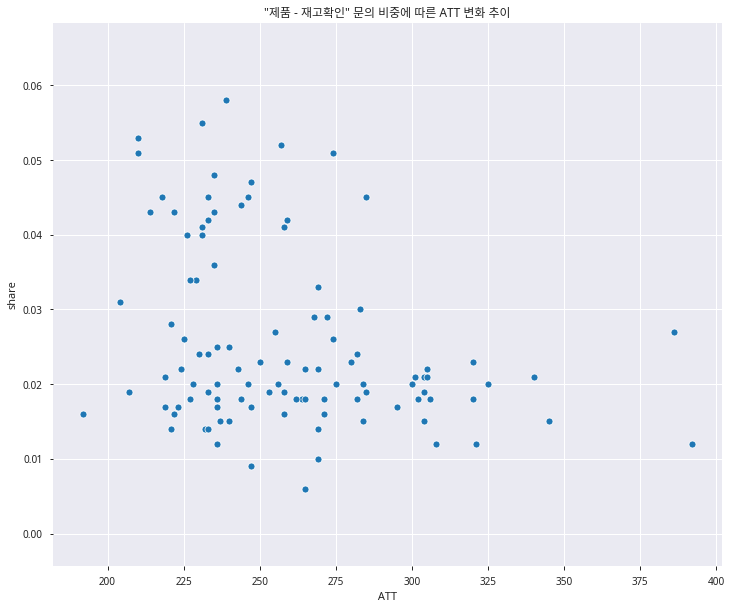

In [101]:
subject = "제품 - 재고확인"
plt.figure(figsize=(12,10))
sns.scatterplot(x=tmp[tmp.Wrapupcode==subject].iloc[:,4]
                , y=tmp[tmp.Wrapupcode==subject].iloc[:,5])
plt.title('"{}" 문의 비중에 따른 ATT 변화 추이'.format(subject))

Text(0.5, 1.0, '"부가서비스(매장) - 변경/취소" 문의 비중에 따른 ATT 변화 추이')

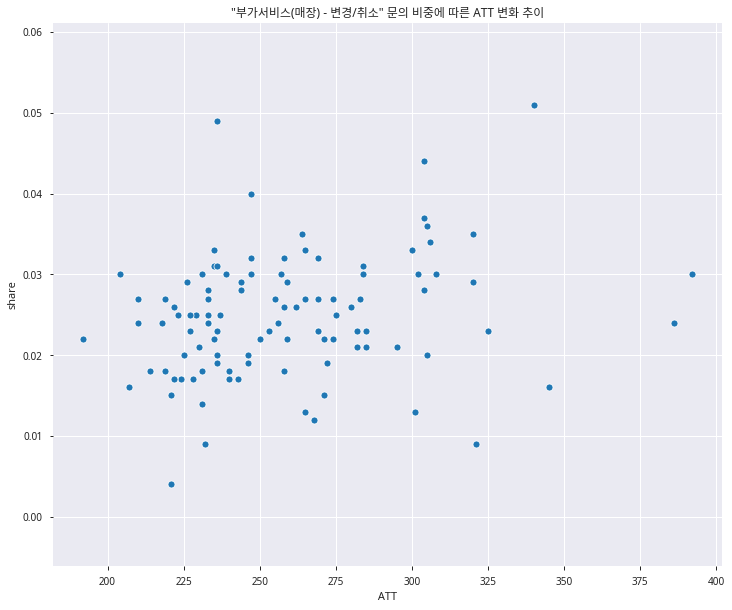

In [100]:
subject = "부가서비스(매장) - 변경/취소"
plt.figure(figsize=(12,10))
sns.scatterplot(x=tmp[tmp.Wrapupcode==subject].iloc[:,4]
                , y=tmp[tmp.Wrapupcode==subject].iloc[:,5])
plt.title('"{}" 문의 비중에 따른 ATT 변화 추이'.format(subject))

Text(7.235106866757617, 0.102, '7.24')

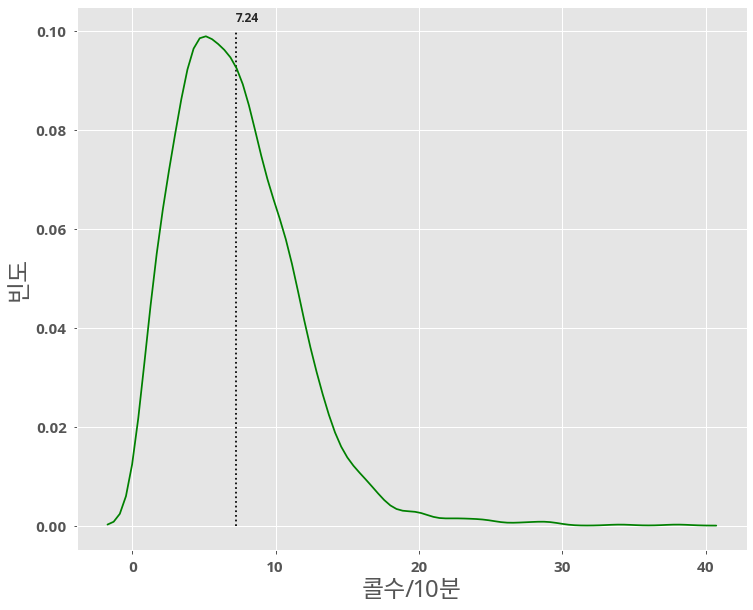

In [114]:

plt.figure(figsize=(12,10))
sns.distplot(tmp['count'], hist=False, color='green')
plt.vlines(x=np.mean(tmp['count']), ymin=0,ymax=0.1, linestyles='dotted')
plt.xlabel('콜수/10분')
plt.ylabel('빈도')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(s=round(np.mean(tmp['count']),2), x=np.mean(tmp['count']), y = 0.102, size=12, color = )

In [ ]:
pp.ProfileReport(tmp)

In [47]:
mean([1,2,3,4])

NameError: name 'mean' is not defined

In [4]:
import matplotlib.font_manager as fm

In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

In [ ]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'IKEA' in f.name]

In [5]:
path = r'C:\\Windows\\Fonts\\NotoIKEAKorean-Regular.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

Noto IKEA Korean
